# Basic Training Loop - example

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '..')

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from src.experiments import run_training_loop
from src.networks import CustomNeuralNetwork
from src.utils import plot_values

from torch.optim import SGD
from torch.nn import MSELoss
from torch.utils.data import TensorDataset, DataLoader

In [4]:
# Load and normalize the trainig data
data = load_boston()
x, y = data['data'], data['target']
x = MinMaxScaler().fit_transform(x)

In [5]:
# Convert data into Tensors
x = torch.from_numpy(np.ascontiguousarray(x, dtype=np.float32))
y = torch.tensor(y.tolist(), dtype=torch.float32).reshape(-1, 1)

In [6]:
# Split data into train/test sets
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)
train_dataloader = DataLoader(TensorDataset(train_x, train_y), batch_size=32)
test_dataloader = DataLoader(TensorDataset(test_x, test_y), batch_size=32)

In [7]:
# Define model and hyperparameters
model = CustomNeuralNetwork(layers=[13, 16, 4, 1], hidden_activations="sigmoid")
model

CustomNeuralNetwork(
  (network): Sequential(
    (0): Linear(in_features=13, out_features=16, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=16, out_features=4, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=4, out_features=1, bias=True)
  )
)

In [8]:
optimizer = SGD(model.parameters(), lr=0.01)
criterion = MSELoss()

In [9]:
# Start training
model, train_loss, test_loss = run_training_loop(
    optimizer, criterion, model, train_dataloader, test_dataloader, epochs=200, use_wandb=False
)

100%|██████████| 200/200 [00:04<00:00, 45.75it/s]


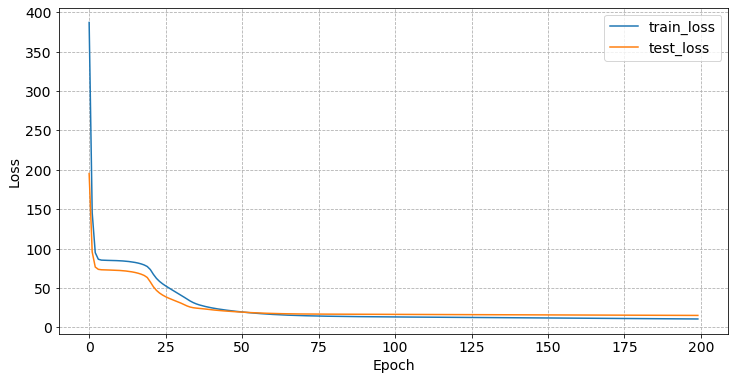

In [10]:
# Plot values
plot_values({
    'train_loss': train_loss,
    'test_loss': test_loss,
})